In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("combined.xlsx")
df

,it,ft,bt,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats_1,Color,Gear Box,Drive Type,City
0,0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,â‚¹ 4 Lakh,Third Party insurance,"1,20,000 Kms",23.1 kmpl,998 CC,5.0,White,5 Speed,FWD,Bangalore
1,0,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,â‚¹ 8.11 Lakh,Comprehensive,"32,706 Kms",17 kmpl,1497 CC,5.0,White,5 Speed,FWD,Bangalore
2,0,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,â‚¹ 5.85 Lakh,Comprehensive,"11,949 Kms",23.84 kmpl,1199 CC,5.0,Red,5 Speed,FWD,Bangalore
3,0,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,â‚¹ 4.62 Lakh,Comprehensive,"17,794 Kms",19.1 kmpl,1197 CC,5.0,Others,5 Speed,FWD,Bangalore
4,0,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,â‚¹ 7.90 Lakh,Third Party insurance,"60,000 Kms",23.65 kmpl,1248 CC,5.0,Gray,5 Speed,FWD,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,Manual,1,Maruti,Maruti Celerio,2022,â‚¹ 5.10 Lakh,Third Party insurance,"10,000 Kms",25.24 kmpl,998 CC,5.0,Others,5-Speed,NaN,Kolkata
8365,0,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto 800,2014,â‚¹ 1.80 Lakh,Third Party insurance,"1,20,000 Kms",22.74 kmpl,796 CC,5.0,Others,5 Speed,FWD,Kolkata
8366,0,Petrol,Sedan,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,â‚¹ 5.50 Lakh,Third Party insurance,"50,000 Kms",11.74 kmpl,1796 CC,5.0,Others,7 Speed,RWD,Kolkata
8367,0,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2012,â‚¹ 1.40 Lakh,Third Party insurance,"40,000 Kms",18.5 kmpl,1197 CC,5.0,Others,5 Speed,FWD,Kolkata


In [3]:
# count of missing values
df.isnull().sum()

it                       0
ft                       0
bt                       4
transmission             0
ownerNo                  0
oem                      0
model                    0
modelYear                0
price                    0
Insurance Validity       4
Kms Driven               2
Mileage                287
Engine                   4
Seats_1                  6
Color                    3
Gear Box              2680
Drive Type            3714
City                     0
dtype: int64

# Handling missing values

In [4]:
# drop columns from the dataframe
df.drop(columns=["it","Gear Box","Drive Type"],inplace=True,axis=1)

In [5]:
# body type unique values
df["bt"].unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Coupe', 'Minivans',
       'Pickup Trucks', 'Convertibles', 'Hybrids', nan, 'Wagon'],
      dtype=object)

In [6]:
# retrive nan values from body type
df[pd.isna(df["bt"])]

,ft,bt,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats_1,Color,City
3382,Petrol,NaN,Automatic,1,Toyota,Toyota Vellfire,2023,â‚¹ 1.19 Crore,Comprehensive,"10,500 Kms",NaN,2487 CC,7.0,White,Delhi
5390,Petrol,NaN,Manual,1,Maruti,Maruti Eeco,2019,â‚¹ 4.95 Lakh,Comprehensive,"13,500 Kms",19.71 kmpl,1197 CC,5.0,Silver,Hyderabad
5411,Petrol,NaN,Manual,1,Maruti,Maruti Eeco,2020,â‚¹ 5.20 Lakh,Comprehensive,"16,415 Kms",19.71 kmpl,1197 CC,5.0,Grey,Hyderabad
8114,Petrol,NaN,Manual,1,Maruti,Maruti Eeco,2019,â‚¹ 3.95 Lakh,Comprehensive,"21,166 Kms",19.71 kmpl,1197 CC,5.0,Blue,Kolkata


In [7]:
# replace nan values with model name
df.loc[df['model']=='Toyota Vellfire','bt'] = 'Minivans'
df.loc[df['model']=='Maruti Eeco','bt'] = 'Minivans'

In [8]:
# drop nan values
df.dropna(subset=["Insurance Validity","Kms Driven","Engine","Color"],inplace=True)

In [9]:
# retrive seats nan values
df[pd.isna(df["Seats_1"])]

,ft,bt,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats_1,Color,City
1175,Petrol,Hatchback,Manual,3,Maruti,Maruti Estilo,2009,â‚¹ 2 Lakh,Third Party insurance,"40,000 Kms",19.5 kmpl,1061 CC,NaN,Others,Bangalore
3528,Petrol,SUV,Manual,2,Nissan,Nissan Kicks,2019,â‚¹ 7 Lakh,Third Party insurance,"60,000 Kms",NaN,1498 CC,NaN,Gray,Delhi
6211,Diesel,SUV,Manual,2,Ford,Ford Endeavour,2008,â‚¹ 3.90 Lakh,Third Party insurance,"1,20,000 Kms",11.4 kmpl,2953 CC,NaN,Black,Jaipur
7608,Petrol,Hatchback,Manual,2,Maruti,Maruti Estilo,2010,â‚¹ 1.20 Lakh,Third Party insurance,"70,000 Kms",19.5 kmpl,1061 CC,NaN,Others,Kolkata
7669,Petrol,Hatchback,Manual,2,Maruti,Maruti Estilo,2009,â‚¹ 1.20 Lakh,Third Party insurance,"50,000 Kms",19.5 kmpl,1061 CC,NaN,Gold,Kolkata
7745,Diesel,Sedan,Manual,1,Hindustan Motors,Ambassador,2014,â‚¹ 1.20 Lakh,Third Party insurance,"1,20,000 Kms",12.8 kmpl,1995 CC,NaN,Yellow,Kolkata


In [10]:
# replace nan values of seats
df.loc[df['model']=='Maruti Estilo','Seats_1'] = 5.0
df.loc[df['model']=='Nissan Kicks','Seats_1'] = 5.0
df.loc[df['model']=='Ford Endeavour','Seats_1'] = 7.0
df.loc[df['model']=='Ambassador','Seats_1'] = 5.0

In [11]:
# count of missing values
df.isnull().sum()

ft                      0
bt                      0
transmission            0
ownerNo                 0
oem                     0
model                   0
modelYear               0
price                   0
Insurance Validity      0
Kms Driven              0
Mileage               284
Engine                  0
Seats_1                 0
Color                   0
City                    0
dtype: int64

In [12]:
# drop columns from the dataframe
df.drop(columns=["Engine"],inplace=True)
df.reset_index(drop=True, inplace=True)

# handling duplicated values

In [13]:
# Check for duplicate rows
duplicates = df.duplicated()

# Show duplicate rows
duplicate_rows = df[df.duplicated()]
duplicate_rows

,ft,bt,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats_1,Color,City
79,Petrol,Hatchback,Manual,2,Maruti,Maruti Ritz,2014,â‚¹ 4.20 Lakh,Third Party insurance,"60,000 Kms",18.5 kmpl,5.0,Silver,Bangalore
113,Petrol,SUV,Automatic,1,Hyundai,Hyundai Venue,2019,â‚¹ 12.50 Lakh,Third Party insurance,"20,000 Kms",18.15 kmpl,5.0,Others,Bangalore
121,Petrol,Hatchback,Manual,3,Hyundai,Hyundai i10,2009,â‚¹ 2.49 Lakh,Third Party insurance,"80,000 Kms",20.36 kmpl,5.0,Others,Bangalore
180,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,â‚¹ 4 Lakh,Third Party insurance,"1,20,000 Kms",23.1 kmpl,5.0,White,Bangalore
194,Petrol,Sedan,Manual,1,Fiat,Fiat Linea,2009,â‚¹ 3.75 Lakh,Third Party insurance,"50,000 Kms",16 kmpl,5.0,Gray,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8202,Petrol,Sedan,Automatic,1,Volkswagen,Volkswagen Vento,2017,â‚¹ 6.50 Lakh,Comprehensive,"54,000 Kms",18.19 kmpl,5.0,Grey,Kolkata
8254,Petrol,SUV,Automatic,1,Hyundai,Hyundai Venue,2021,â‚¹ 9.50 Lakh,Comprehensive,"29,000 Kms",18.15 kmpl,5.0,White,Kolkata
8287,Petrol,MUV,Manual,1,Kia,Kia Carens,2022,â‚¹ 10.99 Lakh,Comprehensive,"20,000 Kms",NaN,7.0,White,Kolkata
8329,Petrol,Hatchback,Manual,1,Maruti,Maruti Swift,2021,â‚¹ 6.50 Lakh,Third Party insurance,"10,000 Kms",21.21 kmpl,5.0,Others,Kolkata


In [14]:
df.drop_duplicates(inplace=True)
df.shape

(8249, 14)

# data analysis

In [15]:
# top 5 values from dataframe
df.head()

,ft,bt,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats_1,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,â‚¹ 4 Lakh,Third Party insurance,"1,20,000 Kms",23.1 kmpl,5.0,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,â‚¹ 8.11 Lakh,Comprehensive,"32,706 Kms",17 kmpl,5.0,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,â‚¹ 5.85 Lakh,Comprehensive,"11,949 Kms",23.84 kmpl,5.0,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,â‚¹ 4.62 Lakh,Comprehensive,"17,794 Kms",19.1 kmpl,5.0,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,â‚¹ 7.90 Lakh,Third Party insurance,"60,000 Kms",23.65 kmpl,5.0,Gray,Bangalore


In [16]:
# size of the dataframe
df.shape

(8249, 14)

In [17]:
# statistical view of the numerical data 
df.describe()

,ownerNo,modelYear,Seats_1
count,8249.000000,8249.000000,8249.000000
mean,1.356771,2016.523457,5.202206
std,0.637594,3.892433,0.662374
min,0.000000,1985.000000,2.000000
25%,1.000000,2014.000000,5.000000
50%,1.000000,2017.000000,5.000000
75%,2.000000,2019.000000,5.000000
max,5.000000,2023.000000,10.000000


In [18]:
# statistical view of the categorical data 
df.describe(include="object")

,ft,bt,transmission,oem,model,price,Insurance Validity,Kms Driven,Mileage,Color,City
count,8249,8249,8249,8249,8249,8249,8249,8249,7968,8249,8249
unique,5,10,2,33,315,1399,7,4087,521,152,6
top,Petrol,Hatchback,Manual,Maruti,Honda City,â‚¹ 6.50 Lakh,Third Party insurance,"1,20,000 Kms",18.9 kmpl,Others,Delhi
freq,5467,3526,5969,2216,365,103,3955,305,306,2095,1470


In [19]:
# information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8249 entries, 0 to 8358
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ft                  8249 non-null   object 
 1   bt                  8249 non-null   object 
 2   transmission        8249 non-null   object 
 3   ownerNo             8249 non-null   int64  
 4   oem                 8249 non-null   object 
 5   model               8249 non-null   object 
 6   modelYear           8249 non-null   int64  
 7   price               8249 non-null   object 
 8   Insurance Validity  8249 non-null   object 
 9   Kms Driven          8249 non-null   object 
 10  Mileage             7968 non-null   object 
 11  Seats_1             8249 non-null   float64
 12  Color               8249 non-null   object 
 13  City                8249 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 966.7+ KB


# Change data type- data cleaning

In [20]:
# Clean Kms Driven
df['Kms Driven'] = (df['Kms Driven'].astype(str)
                    .str.replace('Kms', '', regex=False)
                    .str.replace(',', '', regex=False)
                    .str.strip())
df['Kms Driven'] = pd.to_numeric(df['Kms Driven'], errors='coerce')

# Clean Mileage
df['Mileage'] = (df['Mileage'].astype(str)
                 .str.replace('kmpl', '', regex=False)
                 .str.replace('km/kg', '', regex=False)
                 .str.strip())
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')



# Clean Seats
df['Seats_1'] = pd.to_numeric(df['Seats_1'], errors='coerce').astype('Int64')

# Clean Price
df['price'] = (df['price'].astype(str)
               .str.extract(r'(\d+\.?\d*)')[0])
df['price'] = pd.to_numeric(df['price'], errors='coerce')


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8249 entries, 0 to 8358
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ft                  8249 non-null   object 
 1   bt                  8249 non-null   object 
 2   transmission        8249 non-null   object 
 3   ownerNo             8249 non-null   int64  
 4   oem                 8249 non-null   object 
 5   model               8249 non-null   object 
 6   modelYear           8249 non-null   int64  
 7   price               8249 non-null   float64
 8   Insurance Validity  8249 non-null   object 
 9   Kms Driven          8249 non-null   int64  
 10  Mileage             7968 non-null   float64
 11  Seats_1             8249 non-null   Int64  
 12  Color               8249 non-null   object 
 13  City                8249 non-null   object 
dtypes: Int64(1), float64(2), int64(3), object(8)
memory usage: 974.7+ KB


In [22]:
#fill mileage with mean value
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].mean())
df.isnull().sum()

ft                    0
bt                    0
transmission          0
ownerNo               0
oem                   0
model                 0
modelYear             0
price                 0
Insurance Validity    0
Kms Driven            0
Mileage               0
Seats_1               0
Color                 0
City                  0
dtype: int64

# Replace column name

In [23]:
df=df.rename(columns={"ft":"Fuel type","bt":"body type","Seats_1":"Seats","oem":"Brand"})
df

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.10,5,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,17.00,5,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,23.84,5,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,19.10,5,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,23.65,5,Gray,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,Petrol,Hatchback,Manual,1,Maruti,Maruti Celerio,2022,5.10,Third Party insurance,10000,25.24,5,Others,Kolkata
8355,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto 800,2014,1.80,Third Party insurance,120000,22.74,5,Others,Kolkata
8356,Petrol,Sedan,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,5.50,Third Party insurance,50000,11.74,5,Others,Kolkata
8357,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2012,1.40,Third Party insurance,40000,18.50,5,Others,Kolkata


# Data Visualization

In [24]:
df["Fuel type"].unique()

array(['Petrol', 'Diesel', 'Lpg', 'Cng', 'Electric'], dtype=object)

In [25]:
df["Fuel type"].value_counts()

Fuel type
Petrol      5467
Diesel      2643
Cng           96
Electric      27
Lpg           16
Name: count, dtype: int64

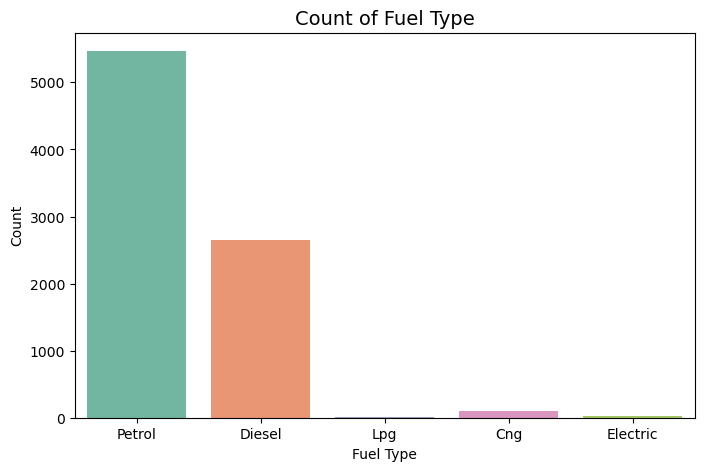

In [26]:
# visual the count of fuel type
plt.figure(figsize=(8,5))
sns.countplot(x="Fuel type", data=df, palette="Set2")
plt.title("Count of Fuel Type", fontsize=14)
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

In [27]:
df["body type"].unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Coupe', 'Minivans',
       'Pickup Trucks', 'Convertibles', 'Hybrids', 'Wagon'], dtype=object)

In [28]:
df["body type"].value_counts()

body type
Hatchback        3526
SUV              2199
Sedan            2133
MUV               342
Minivans           25
Coupe              10
Pickup Trucks       6
Convertibles        6
Hybrids             1
Wagon               1
Name: count, dtype: int64

<Axes: title={'center': 'count of body type'}, xlabel='body type', ylabel='count'>

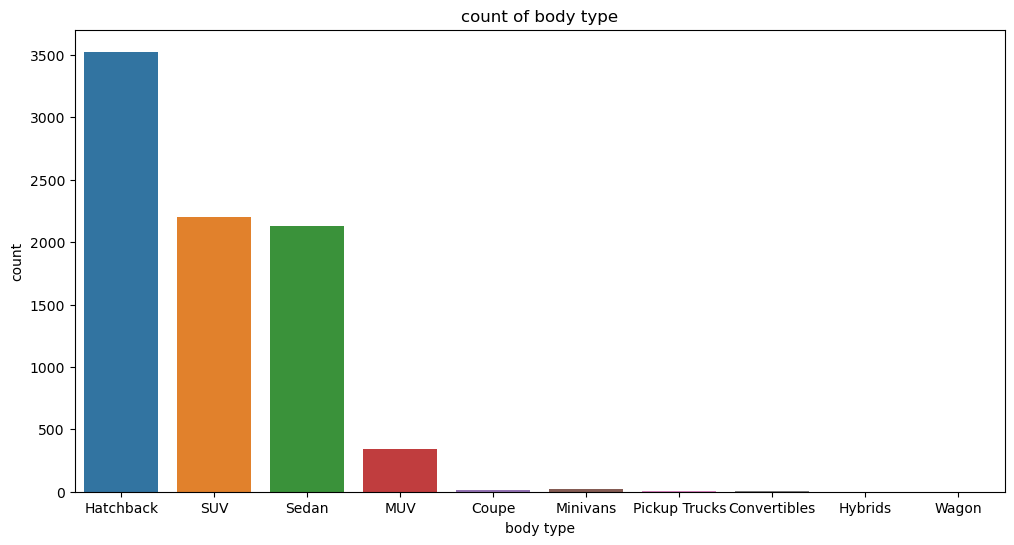

In [29]:
# visual the count of body type
plt.figure(figsize=(12,6))
plt.title("count of body type")
sns.countplot(x=df["body type"],data=df,hue="body type")

In [30]:
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [31]:
df["transmission"].value_counts()

transmission
Manual       5969
Automatic    2280
Name: count, dtype: int64

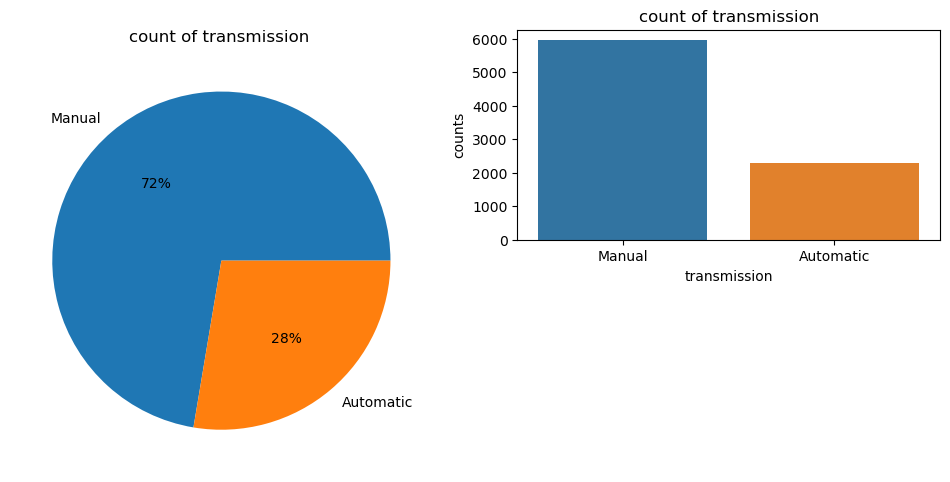

In [32]:
# visual the count of transmission
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("count of transmission ")
plt.pie(df["transmission"].value_counts(),autopct="%1.0f%%",labels=['Manual','Automatic'])
plt.subplot(2,2,2)
sns.countplot(x=df["transmission"],data=df,hue="transmission")
plt.xlabel("transmission")
plt.ylabel("counts")
plt.title("count of transmission")
plt.show()

In [33]:
df["Brand"].unique()

array(['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
       'Mahindra', 'Mercedes-Benz', 'BMW', 'Renault', 'Audi', 'Toyota',
       'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'MG', 'Nissan',
       'Fiat', 'Mahindra Ssangyong', 'Mitsubishi', 'Jaguar', 'Land Rover',
       'Chevrolet', 'Citroen', 'Opel', 'Mahindra Renault', 'Isuzu',
       'Lexus', 'Porsche', 'Hindustan Motors'], dtype=object)

In [34]:
df["Brand"].value_counts()

Brand
Maruti                2216
Hyundai               1632
Honda                  853
Tata                   427
Mahindra               371
Toyota                 322
Renault                308
Ford                   307
Volkswagen             284
Mercedes-Benz          241
BMW                    182
Audi                   156
Skoda                  156
Kia                    155
Jeep                   111
MG                      88
Nissan                  78
Chevrolet               76
Datsun                  74
Land Rover              44
Volvo                   41
Jaguar                  34
Fiat                    30
Mitsubishi              13
Mini                    12
Citroen                  8
Porsche                  6
Isuzu                    5
Mahindra Ssangyong       4
Lexus                    4
Mahindra Renault         4
Hindustan Motors         4
Opel                     3
Name: count, dtype: int64

In [35]:
df["modelYear"].unique()

array([2015, 2018, 2014, 2020, 2017, 2021, 2019, 2022, 2016, 2011, 2009,
       2013, 2010, 2008, 2006, 2012, 2005, 2007, 2023, 1998, 2004, 2003,
       2001, 2002, 2000, 1985, 1997, 1999])

In [36]:
df["Insurance Validity"].unique()

array(['Third Party insurance', 'Comprehensive', 'Third Party',
       'Zero Dep', 2, 1, 'Not Available'], dtype=object)

In [37]:
df["Insurance Validity"].value_counts()

Insurance Validity
Third Party insurance    3955
Comprehensive            3136
Third Party               630
Zero Dep                  303
Not Available             221
1                           3
2                           1
Name: count, dtype: int64

In [38]:
df["Color"].unique()

array(['White', 'Red', 'Others', 'Gray', 'Grey', 'Maroon', 'Orange',
       'Silver', 'Blue', 'Brown', 'Yellow', 'Black', 'Golden', 'Green',
       'O Purple', 'Other', 'Gold', 'TITANIUM GREY', 'Violet',
       'MODERN STEEL METALLIC', 'PLATINUM WHITE', 'Golden Brown',
       'Aurora Black Pearl', 'Beige', 'Star Dust', 'Flash Red', 'Purple',
       'PLATINUM WHITE PEARL', 'Wine Red', 'Taffeta White',
       'Minimal Grey', 'Fiery Red', 'T Wine', 'Prime Star Gaze',
       'TAFETA WHITE', 'P Black', 'Golden brown', 'METALL',
       'MET ECRU BEIGE', 'COPPER', 'TITANIUM', 'CHILL', 'Burgundy',
       'Lunar Silver Metallic', 'SILKY SILVER', 'BERRY RED',
       'PREMIUM AMBER METALLIC', 'R EARTH', 'PLATINUM SILVER',
       'ORCHID WHITE PEARL', 'CARNELIAN RED PEARL', 'POLAR WHITE',
       'BEIGE', 'Medium Blue', 'Alabaster Silver Metallic',
       'Carbon Steel', 'Cavern Grey', 'ESPRESO_BRWN', 'Pearl White',
       'Polar White', 'Magma Grey', 'Dark Red', 'Falsa Colour', 'Cherry',
       'H

In [39]:
df["body type"].unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Coupe', 'Minivans',
       'Pickup Trucks', 'Convertibles', 'Hybrids', 'Wagon'], dtype=object)

In [40]:
# check seats with respect to body type
print(f'Hatchback: {df[df["body type"]=="Hatchback"]["Seats"].unique()}')
print(f'SUV: {df[df["body type"]=="SUV"]["Seats"].unique()}')
print(f'Sedan: {df[df["body type"]=="Sedan"]["Seats"].unique()}')
print(f'MUV: {df[df["body type"]=="MUV"]["Seats"].unique()}')
print(f'Coupe: {df[df["body type"]=="Coupe"]["Seats"].unique()}')
print(f'Minivans: {df[df["body type"]=="Minivans"]["Seats"].unique()}')
print(f'Convertibles: {df[df["body type"]=="Convertibles"]["Seats"].unique()}')
print(f'Hybrids: {df[df["body type"]=="Hybrids"]["Seats"].unique()}')
print(f'Wagon: {df[df["body type"]=="Wagon"]["Seats"].unique()}')
print(f'MPickup Trucks: {df[df["body type"]=="Pickup Trucks"]["Seats"].unique()}')

Hatchback: <IntegerArray>
[5, 4, 6]
Length: 3, dtype: Int64
SUV: <IntegerArray>
[5, 7, 6, 8, 4, 9, 10]
Length: 7, dtype: Int64
Sedan: <IntegerArray>
[5, 4]
Length: 2, dtype: Int64
MUV: <IntegerArray>
[7, 8, 10, 6, 5]
Length: 5, dtype: Int64
Coupe: <IntegerArray>
[5, 4, 2]
Length: 3, dtype: Int64
Minivans: <IntegerArray>
[5, 7, 8]
Length: 3, dtype: Int64
Convertibles: <IntegerArray>
[4, 2]
Length: 2, dtype: Int64
Hybrids: <IntegerArray>
[4]
Length: 1, dtype: Int64
Wagon: <IntegerArray>
[5]
Length: 1, dtype: Int64
MPickup Trucks: <IntegerArray>
[5, 2]
Length: 2, dtype: Int64


In [41]:
import os
#current directory or current folder or path you are working now
print("current directory",os.getcwd())

current directory c:\phython training\VSCODE\project\CARPROJECT


In [42]:
path = r"C:\phython training\VSCODE\project\final_model.csv"
os.makedirs(os.path.dirname(path), exist_ok=True)
df.to_csv(path, index=False)

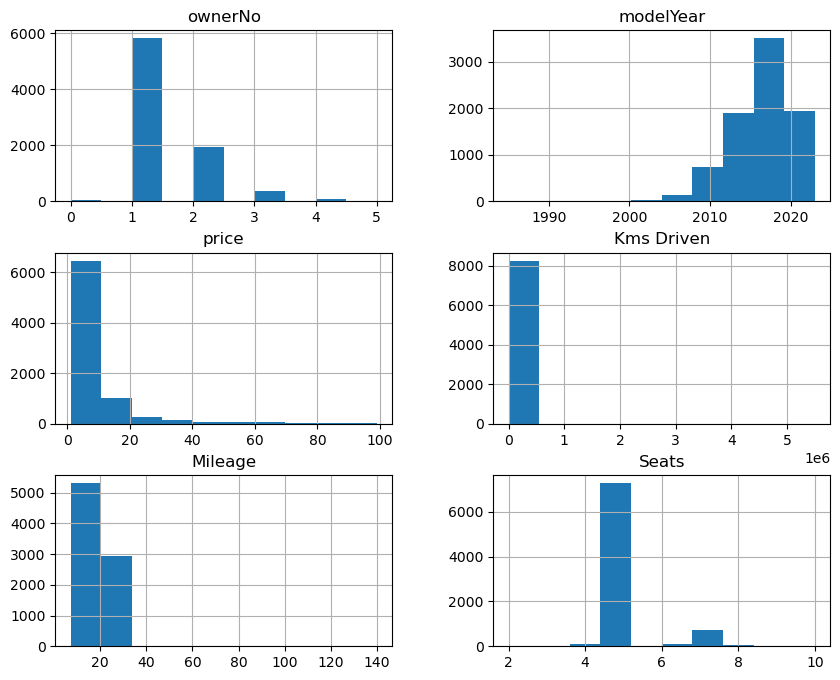

In [43]:
# histogram to visual the data distribution
df.hist(figsize=(10,8))
plt.show()

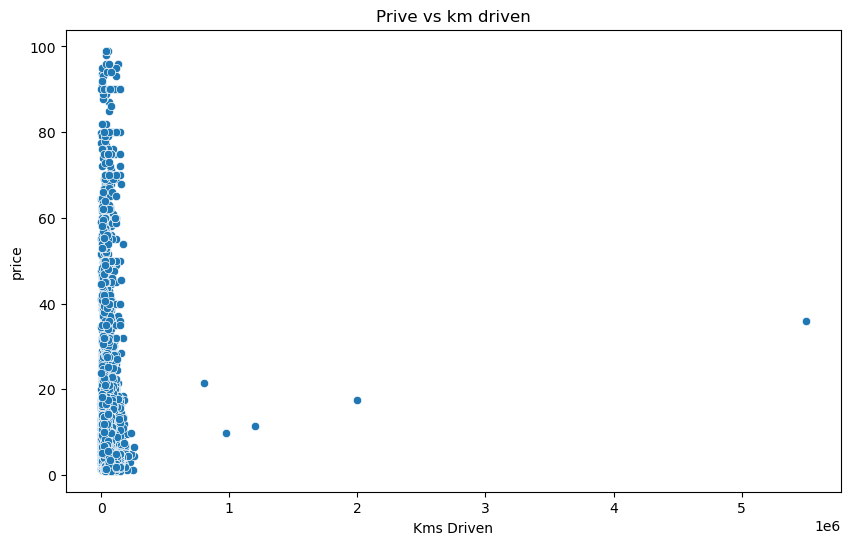

In [44]:
# scatterplot to visual the data distribution
plt.figure(figsize=(10, 6))
plt.title("Prive vs km driven")
sns.scatterplot(y='price', x='Kms Driven', data=df)
plt.xlabel("Kms Driven")
plt.ylabel("price")
plt.show()

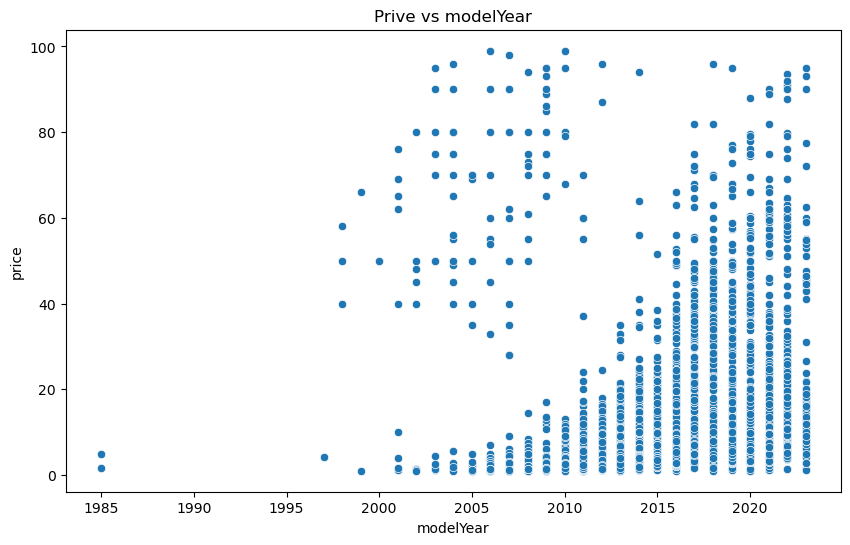

In [45]:
# scatterplot to visual the data distribution
plt.figure(figsize=(10, 6))
plt.title("Prive vs modelYear")
sns.scatterplot(y='price', x='modelYear', data=df)
plt.xlabel("modelYear")
plt.ylabel("price")
plt.show()

<Axes: xlabel='transmission', ylabel='price'>

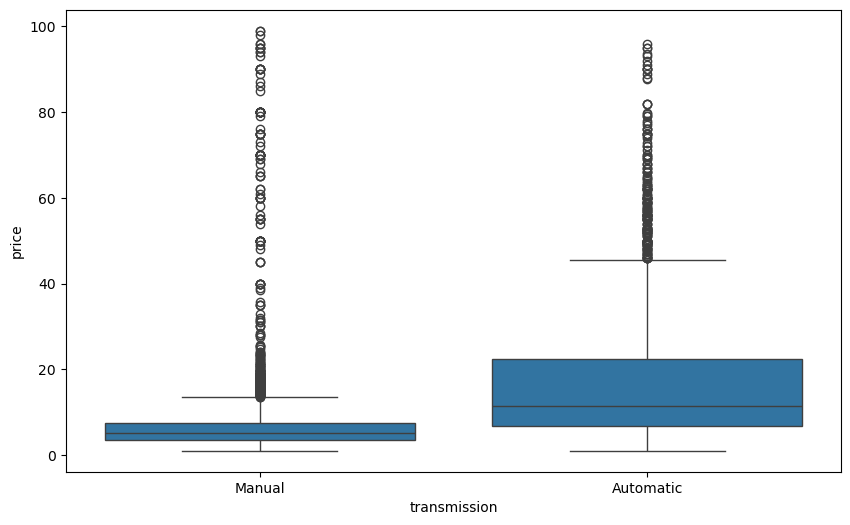

In [46]:
# transmission and price
plt.figure(figsize=(10,6))
sns.boxplot(x='transmission', y='price', data=df)

<Axes: xlabel='modelYear', ylabel='price'>

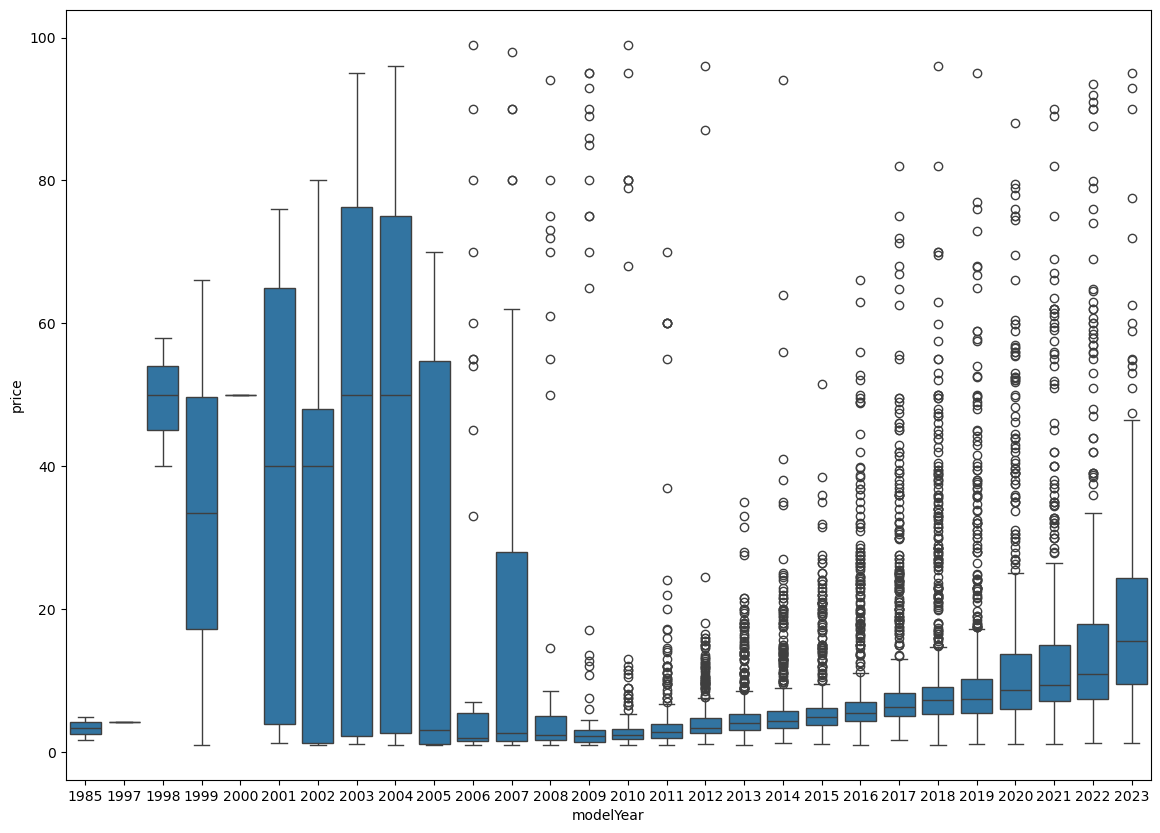

In [47]:
# modelYear and price
plt.figure(figsize=(14, 10))
sns.boxplot(x='modelYear', y='price', data=df)

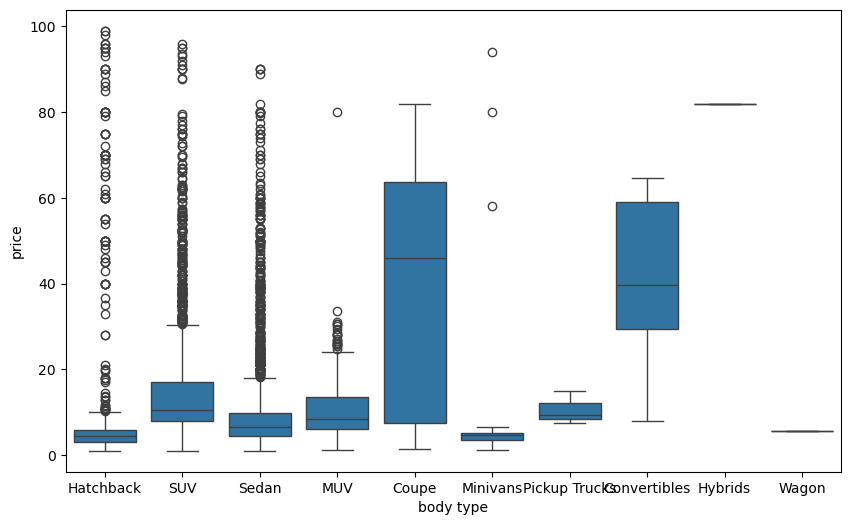

In [48]:
# body type	 and price
plt.figure(figsize=(10,6))
sns.boxplot(x='body type', y='price', data=df)
plt.show()

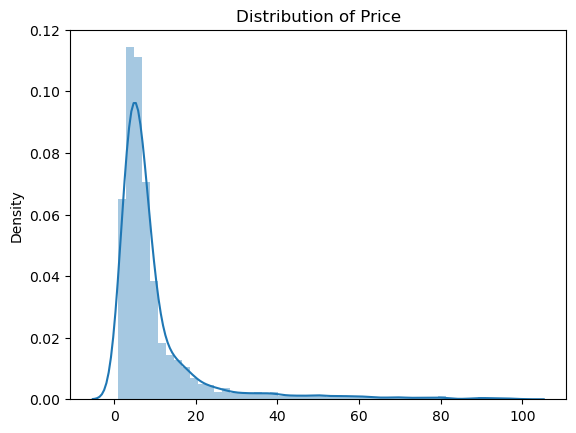

In [49]:
#distribution before outliers removing
sns.distplot(x=df["price"], kde=True)  # kde=True adds the KDE curve along with the histogram
plt.title("Distribution of Price")
plt.show()

In [50]:
path = r"C:\phython training\VSCODE\project\final_df.csv"
df.to_csv(path, index=False)

# Handling outliers

In [51]:
# Removing outliers from the 'price' column using IQR method
# Calculate Q1, Q3, and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers from DataFrame
df_filtered = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

# Count of lower outliers
low_outliers = len(df[df['price'] < (Q1 - 1.5 * IQR)])

# Count of upper outliers
high_outliers = len(df[df['price'] > (Q3 + 1.5 * IQR)])

# Print outlier counts
print(f"Count of lower outliers: {low_outliers}")
print(f"Count of upper outliers: {high_outliers}")

Count of lower outliers: 0
Count of upper outliers: 908


In [52]:
df_filtered.reset_index(inplace=True,drop=True)


In [53]:
df["Brand"].unique()

array(['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
       'Mahindra', 'Mercedes-Benz', 'BMW', 'Renault', 'Audi', 'Toyota',
       'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'MG', 'Nissan',
       'Fiat', 'Mahindra Ssangyong', 'Mitsubishi', 'Jaguar', 'Land Rover',
       'Chevrolet', 'Citroen', 'Opel', 'Mahindra Renault', 'Isuzu',
       'Lexus', 'Porsche', 'Hindustan Motors'], dtype=object)

In [54]:
df[df["Brand"] == "BMW"]["price"].max()

93.5

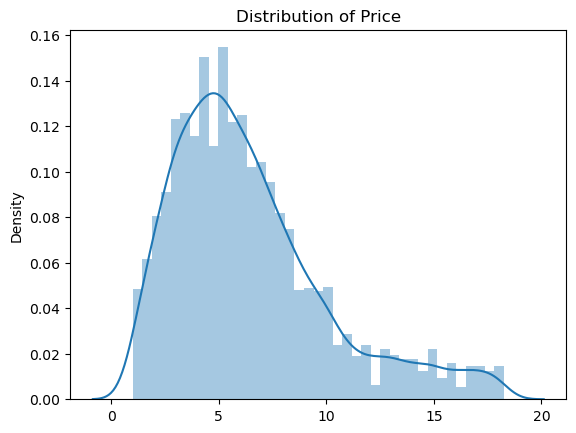

In [55]:
#distribution after outliers removing
sns.distplot(x=df_filtered["price"], kde=True)  # kde=True adds the KDE curve along with the histogram
plt.title("Distribution of Price")
plt.show()

In [57]:
max_price_index = df_filtered["price"].idxmax()
max_price_row = df_filtered.loc[max_price_index]
print(max_price_row)

Fuel type                     Diesel
body type                        SUV
transmission               Automatic
ownerNo                            1
Brand                        Hyundai
model                 Hyundai Tucson
modelYear                       2017
price                          18.25
Insurance Validity     Comprehensive
Kms Driven                     57000
Mileage                        16.38
Seats                              5
Color                          White
City                       Bangalore
Name: 109, dtype: object


# Scaling and Encoding

In [58]:
# creating a list to hold name of the categorical columns
catg_col=df_filtered.select_dtypes(include="object").columns.to_list()

In [59]:
catg_col

['Fuel type',
 'body type',
 'transmission',
 'Brand',
 'model',
 'Insurance Validity',
 'Color',
 'City']

In [60]:
# Convert all categorical data to string type
df_filtered[catg_col] = df_filtered[catg_col].astype(str)

In [61]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False,handle_unknown="ignore")
encoder.fit(df_filtered[catg_col])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [62]:
encoder.categories_

[array(['Cng', 'Diesel', 'Electric', 'Lpg', 'Petrol'], dtype=object),
 array(['Convertibles', 'Coupe', 'Hatchback', 'MUV', 'Minivans',
        'Pickup Trucks', 'SUV', 'Sedan', 'Wagon'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object),
 array(['Audi', 'BMW', 'Chevrolet', 'Citroen', 'Datsun', 'Fiat', 'Ford',
        'Hindustan Motors', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep',
        'Kia', 'Land Rover', 'MG', 'Mahindra', 'Mahindra Renault',
        'Mahindra Ssangyong', 'Maruti', 'Mercedes-Benz', 'Mini',
        'Mitsubishi', 'Nissan', 'Porsche', 'Renault', 'Skoda', 'Tata',
        'Toyota', 'Volkswagen', 'Volvo'], dtype=object),
 array(['Ambassador', 'Audi A3', 'Audi A4', 'Audi A6', 'Audi Q3',
        'Audi Q5', 'Audi Q7', 'BMW 1 Series', 'BMW 3 Series',
        'BMW 3 Series GT', 'BMW 5 Series', 'BMW 6 Series', 'BMW 7 Series',
        'BMW X1', 'BMW X3', 'BMW X5', 'BMW X7', 'Chevrolet Aveo',
        'Chevrolet Beat', 'Chevrolet Captiva', 'Chevrolet Cruze',
        '

In [63]:
#list of new column
new_encoded_col= list(encoder.get_feature_names_out(catg_col))
new_encoded_col

['Fuel type_Cng',
 'Fuel type_Diesel',
 'Fuel type_Electric',
 'Fuel type_Lpg',
 'Fuel type_Petrol',
 'body type_Convertibles',
 'body type_Coupe',
 'body type_Hatchback',
 'body type_MUV',
 'body type_Minivans',
 'body type_Pickup Trucks',
 'body type_SUV',
 'body type_Sedan',
 'body type_Wagon',
 'transmission_Automatic',
 'transmission_Manual',
 'Brand_Audi',
 'Brand_BMW',
 'Brand_Chevrolet',
 'Brand_Citroen',
 'Brand_Datsun',
 'Brand_Fiat',
 'Brand_Ford',
 'Brand_Hindustan Motors',
 'Brand_Honda',
 'Brand_Hyundai',
 'Brand_Isuzu',
 'Brand_Jaguar',
 'Brand_Jeep',
 'Brand_Kia',
 'Brand_Land Rover',
 'Brand_MG',
 'Brand_Mahindra',
 'Brand_Mahindra Renault',
 'Brand_Mahindra Ssangyong',
 'Brand_Maruti',
 'Brand_Mercedes-Benz',
 'Brand_Mini',
 'Brand_Mitsubishi',
 'Brand_Nissan',
 'Brand_Porsche',
 'Brand_Renault',
 'Brand_Skoda',
 'Brand_Tata',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Brand_Volvo',
 'model_Ambassador',
 'model_Audi A3',
 'model_Audi A4',
 'model_Audi A6',
 'model_Audi Q

In [64]:
# transforming the data
df_filtered[new_encoded_col]=encoder.transform(df_filtered[catg_col])
df_filtered.head()

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,...,Color_golden brown,Color_m grey,Color_magma gray,Color_urban titanim,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# drop the unwanted columns
df_filtered.drop(columns=catg_col,inplace=True)
df_filtered

,ownerNo,modelYear,price,Kms Driven,Mileage,Seats,Fuel type_Cng,Fuel type_Diesel,Fuel type_Electric,Fuel type_Lpg,...,Color_golden brown,Color_m grey,Color_magma gray,Color_urban titanim,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
0,3,2015,4.00,120000,23.10,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,2018,8.11,32706,17.00,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,2018,5.85,11949,23.84,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,2014,4.62,17794,19.10,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,2015,7.90,60000,23.65,5,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7336,1,2022,5.10,10000,25.24,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7337,1,2014,1.80,120000,22.74,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7338,3,2011,5.50,50000,11.74,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7339,1,2012,1.40,40000,18.50,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [66]:
import pickle
with open('encoder.pkl','wb') as file:
    pickle.dump(encoder,file)

In [67]:
path = r"C:\phython training\VSCODE\project\std_enc.csv"
df_filtered.to_csv(path,index=False)

# modelling

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [69]:
df_final=df_filtered

In [70]:
# statistical details of the data
df_final.describe()

,ownerNo,modelYear,price,Kms Driven,Mileage,Seats,Fuel type_Cng,Fuel type_Diesel,Fuel type_Electric,Fuel type_Lpg,...,Color_golden brown,Color_m grey,Color_magma gray,Color_urban titanim,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
count,7341.000000,7341.000000,7341.000000,7.341000e+03,7341.000000,7341.0,7341.000000,7341.000000,7341.000000,7341.000000,...,7341.000000,7341.000000,7341.000000,7341.000000,7341.000000,7341.000000,7341.000000,7341.000000,7341.000000,7341.000000
mean,1.363166,2016.413840,6.435539,5.964839e+04,19.646734,5.173682,0.012805,0.282659,0.002861,0.001907,...,0.000136,0.000136,0.000136,0.000136,0.177360,0.169051,0.163738,0.184307,0.136085,0.169459
std,0.638224,3.725872,3.666917,4.426061e+04,3.713224,0.618466,0.112439,0.450323,0.053412,0.043632,...,0.011671,0.011671,0.011671,0.011671,0.381999,0.374822,0.370063,0.387761,0.342902,0.375183
min,0.000000,1985.000000,1.000000,1.010000e+02,7.080000,2.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2014.000000,3.800000,3.222800e+04,17.400000,5.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2017.000000,5.650000,5.556600e+04,19.254958,5.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2019.000000,8.100000,8.000000e+04,21.700000,5.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,2023.000000,18.250000,2.000022e+06,140.000000,10.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
# create x and y datas

x=df_final.drop(columns=["price"],axis=1)
y=df_final["price"]

In [72]:
# scaling the data with standardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [73]:
import pickle
with open('standard.pkl','wb') as f:
    pickle.dump(scaler,f)

In [74]:
# function to choose the best algorithm

def best_ML_algorithm(x,y,algorithms):
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

        results = []

        for algorithm in algorithms:

                model=algorithm().fit(x_train,y_train)
                y_pred=model.predict(x_test)
                MSE_1=mean_squared_error(y_test,y_pred)
                MAE_1=mean_absolute_error(y_test,y_pred)
                RMSE_1=np.sqrt(mean_squared_error(y_test,y_pred))
                r_squr_1=r2_score(y_test,y_pred)
                results.append({"model": type(model).__name__,
                                          "MAE": MAE_1,
                                          "MSE": MSE_1,
                                          "RMSE": RMSE_1,
                                           "R2": r_squr_1 })
                print(f"Trainscore: {model.score(x_train, y_train)}")
                print(f"Testscore: {model.score(x_test, y_test)}")
                # Plot Actual vs Predicted Prices
                plt.figure(figsize=(10, 6))
                sns.scatterplot(x=y_test, y=y_pred)
                plt.xlabel('Actual Prices')
                plt.ylabel('Predicted Prices')
                plt.title(f'{type(model).__name__}: Actual vs Predicted Prices')
                plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Add reference line
                plt.show()
        results_df = pd.DataFrame(results)
        
        return results_df 

Trainscore: 0.9000804356330341
Testscore: 0.8345144810587052


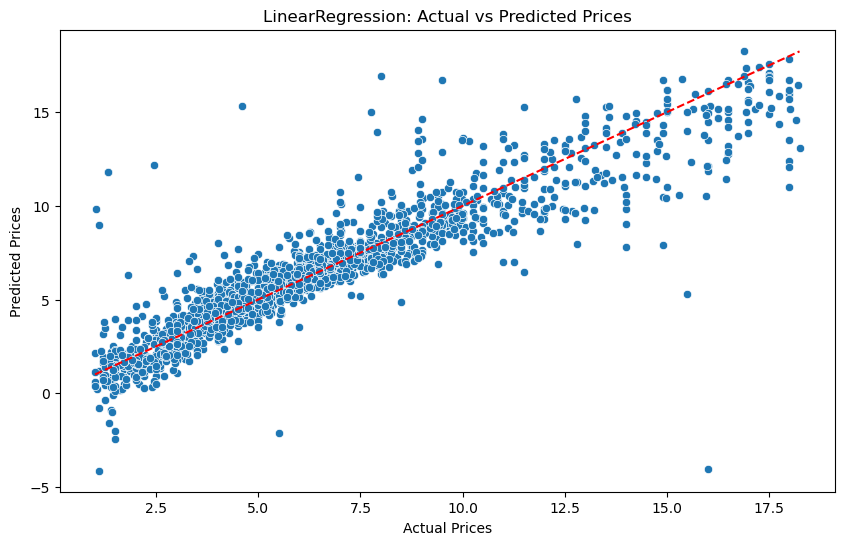

Trainscore: 0.9996672479193255
Testscore: 0.7740699593463672


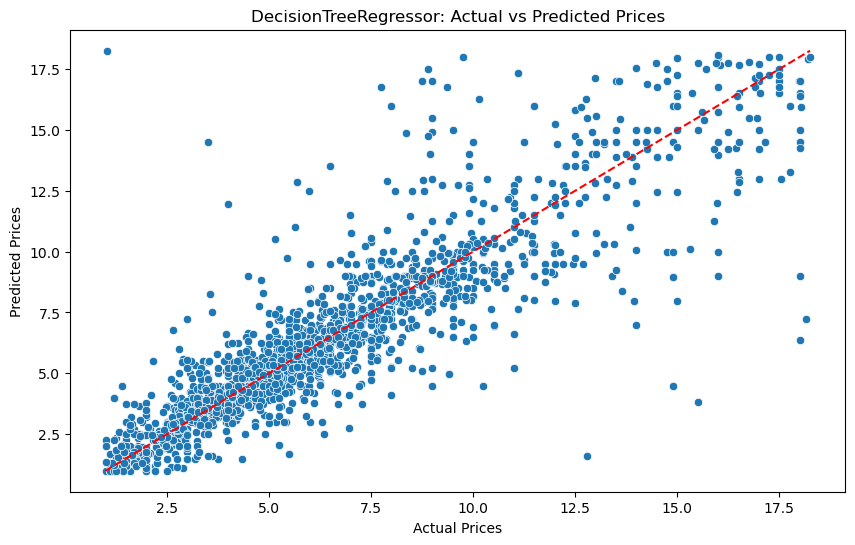

Trainscore: 0.981770600446771
Testscore: 0.8700468028131092


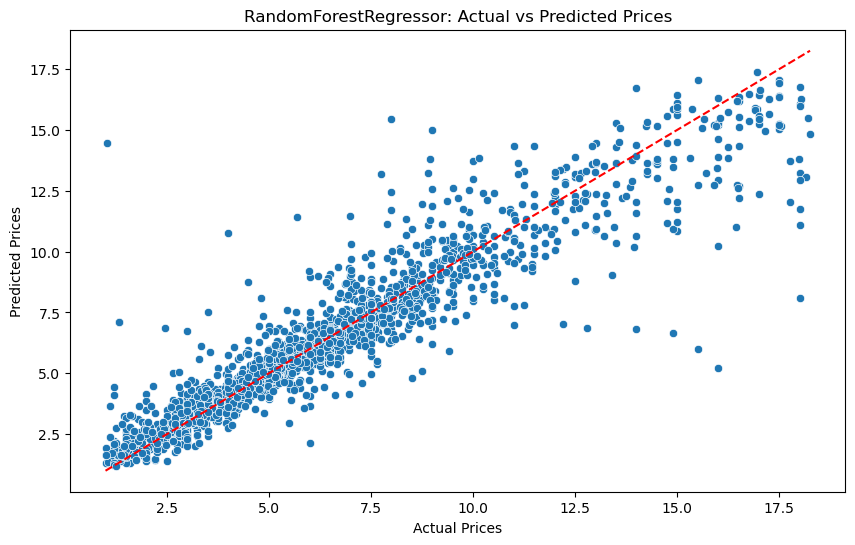

Trainscore: 0.8335755909614292
Testscore: 0.7939294826972693


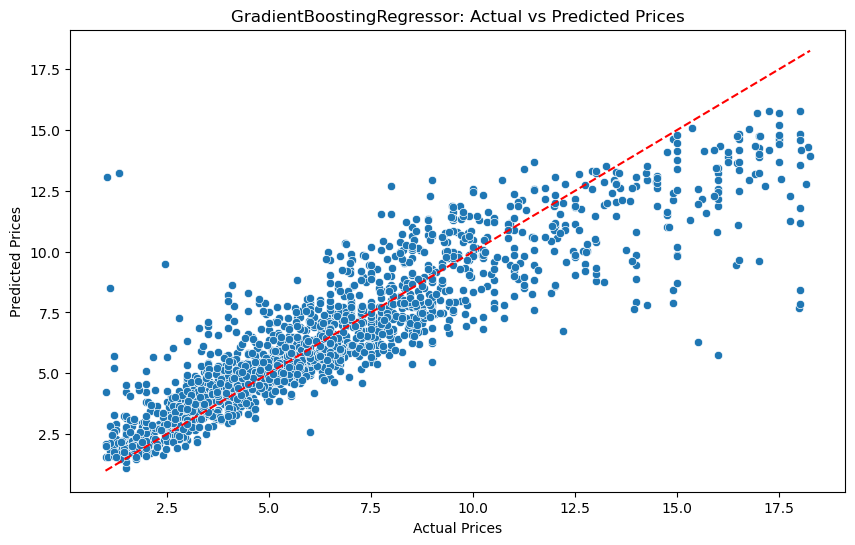

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


# using above function try to identify the best algorithm

algorithms = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor,GradientBoostingRegressor]

results_df = best_ML_algorithm(x_scaled,y, algorithms)

In [76]:
# model comparision
results_df

,model,MAE,MSE,RMSE,R2
0,LinearRegression,0.898355,2.225150,1.491694,0.834514
1,DecisionTreeRegressor,1.054992,3.037899,1.742957,0.774070
2,RandomForestRegressor,0.790443,1.747376,1.321883,0.870047
3,GradientBoostingRegressor,1.112291,2.770864,1.664591,0.793929


# Hyperparameter tuning for the best model-Random forest

In [77]:
# parameters for model
from sklearn.model_selection import RandomizedSearchCV
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25)

param_grid = { 
    'n_estimators' : [100, 150, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False] 
}

In [78]:
# tuning the model using grid search cv
grid_tuning=RandomizedSearchCV(estimator=RandomForestRegressor(),
                            param_distributions=param_grid, cv=5, n_jobs=-1)

grid_tuning.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 150, 200, 300]})

In [79]:
grid_tuning.best_params_,grid_tuning.best_score_

({'n_estimators': 150,
  'min_samples_split': 5,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': None,
  'bootstrap': False},
 np.float64(0.8462037099892565))

In [80]:
# final model fit and prediction
final_model=RandomForestRegressor(n_estimators=300,max_features=None,max_depth=30,min_samples_leaf=2,
                                  min_samples_split=5,random_state=42)

final_model.fit(X_train,Y_train)

#Model evaluation
y_pred_fm=final_model.predict(X_test)
MSE_fm=mean_squared_error(Y_test,y_pred_fm)
MAE_fm=mean_absolute_error(Y_test,y_pred_fm)
RMSE_fm=np.sqrt(mean_squared_error(Y_test,y_pred_fm))
r_squr_fm=r2_score(Y_test,y_pred_fm)

print(f"Trainscore: {final_model.score(X_train, Y_train)}")
print(f"Testscore: {final_model.score(X_test, Y_test)}")

# create dataframe to view above evaluation metrics
rf_1=pd.DataFrame({"model":"RandomForestRegressor","MAE":[MAE_fm],"MSE":[MSE_fm],"RMSE":[RMSE_fm],"R2":r_squr_fm})
rf_1

Trainscore: 0.9628204213906064
Testscore: 0.8642092312865198


,model,MAE,MSE,RMSE,R2
0,RandomForestRegressor,0.821907,1.752817,1.32394,0.864209


# store the model using pickle

In [81]:
import pickle
# store the model using pickle

with open('Randomforest_regression.pkl','wb') as files:
    pickle.dump(final_model,files)

In [82]:
# load the model,scaler and encoder
with open('Randomforest_regression.pkl','rb') as files:
    final_model=pickle.load(files)

with open('standard.pkl','rb') as f:
    scaler=pickle.load(f)

with open('encoder.pkl','rb') as file:
    encoder=pickle.load(file)

# model system buliding-Pipeline

In [83]:
#read final csv file
df_1=pd.read_csv("final_model.csv")
df_1

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.10,5,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,17.00,5,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,23.84,5,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,19.10,5,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,23.65,5,Gray,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,Petrol,Hatchback,Manual,1,Maruti,Maruti Celerio,2022,5.10,Third Party insurance,10000,25.24,5,Others,Kolkata
8355,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto 800,2014,1.80,Third Party insurance,120000,22.74,5,Others,Kolkata
8356,Petrol,Sedan,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,5.50,Third Party insurance,50000,11.74,5,Others,Kolkata
8357,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2012,1.40,Third Party insurance,40000,18.50,5,Others,Kolkata


In [84]:
# x and y data splitting
x_df=df_1.drop(columns=["price"],axis=1)
y_df=df_1["price"]

In [85]:
x_df_train,x_df_test,y_df_train,y_df_test=train_test_split(x_df,y_df,random_state=42)

In [86]:
# building pipeline for categorical and numerical data
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num=x_df.select_dtypes(include=["int","float"]).columns.to_list()
cat=x_df.select_dtypes(include=["object"]).columns.to_list()

catg_preprocessor=Pipeline(steps=[("categorical",encoder)])
num_preprocessor=Pipeline(steps=[("numerical",scaler)])

In [87]:
# compose preprocessing techniques
preprocessor=ColumnTransformer([("numerical",num_preprocessor,num),
                                ("categorical",catg_preprocessor,cat)])
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('numerical',
                                                  StandardScaler())]),
                                 ['ownerNo', 'modelYear', 'Kms Driven',
                                  'Mileage', 'Seats']),
                                ('categorical',
                                 Pipeline(steps=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Fuel type', 'body type', 'transmission',
                                  'Brand', 'model', 'Insurance Validity',
                                  'Color', 'City'])])

In [88]:
#construct pipeline to combine preprocessor and model
pipeline=Pipeline([("preprocessing",preprocessor),
                   ("model",final_model)])
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('numerical',
                                                                   StandardScaler())]),
                                                  ['ownerNo', 'modelYear',
                                                   'Kms Driven', 'Mileage',
                                                   'Seats']),
                                                 ('categorical',
                                                  Pipeline(steps=[('categorical',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Fuel type', 'body type',
                                                   'transmission', 'Brand',
                                                   'model',
                                                   'Insurance Validity',
                                                   'Color', 'City'])])),
                ('model',
                 RandomForestRegressor(max_depth=30, max_features=None,
                                       min_samples_leaf=2, min_samples_split=5,
                                       n_estimators=300, random_state=42))])

In [89]:
# fit with dataframe
pipeline.fit(x_df_train,y_df_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('numerical',
                                                                   StandardScaler())]),
                                                  ['ownerNo', 'modelYear',
                                                   'Kms Driven', 'Mileage',
                                                   'Seats']),
                                                 ('categorical',
                                                  Pipeline(steps=[('categorical',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Fuel type', 'body type',
                                                   'transmission', 'Brand',
                                                   'model',
                                                   'Insurance Validity',
                                                   'Color', 'City'])])),
                ('model',
                 RandomForestRegressor(max_depth=30, max_features=None,
                                       min_samples_leaf=2, min_samples_split=5,
                                       n_estimators=300, random_state=42))])

In [90]:
# evaluate the pipeline 
y_prediction=pipeline.predict(x_df_test)

MSE_pipe=mean_squared_error(y_df_test,y_prediction)

MAE_pipe=mean_absolute_error(y_df_test,y_prediction)

RMSE_pipe=np.sqrt(mean_squared_error(y_df_test,y_prediction))

r_squr_pipe=r2_score(y_df_test,y_prediction)

# create dataframe to view above evaluation metrics
Rf_Pipe=pd.DataFrame({"model":"RandomForestRegressor","MAE":[MAE_pipe],"MSE":[MSE_pipe],"RMSE":[RMSE_pipe],"R2":r_squr_pipe})
Rf_Pipe

,model,MAE,MSE,RMSE,R2
0,RandomForestRegressor,2.307981,48.419009,6.958377,0.665443


In [91]:
x_df.columns

Index(['Fuel type', 'body type', 'transmission', 'ownerNo', 'Brand', 'model',
       'modelYear', 'Insurance Validity', 'Kms Driven', 'Mileage', 'Seats',
       'Color', 'City'],
      dtype='object')

In [92]:
x_df["Brand"].unique()

array(['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
       'Mahindra', 'Mercedes-Benz', 'BMW', 'Renault', 'Audi', 'Toyota',
       'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'MG', 'Nissan',
       'Fiat', 'Mahindra Ssangyong', 'Mitsubishi', 'Jaguar', 'Land Rover',
       'Chevrolet', 'Citroen', 'Opel', 'Mahindra Renault', 'Isuzu',
       'Lexus', 'Porsche', 'Hindustan Motors'], dtype=object)

In [93]:
x_df[x_df["Brand"]=="BMW"]

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
20,Diesel,Sedan,Automatic,3,BMW,BMW 5 Series,2011,Third Party insurance,100000,18.48,5,White,Bangalore
38,Petrol,Sedan,Automatic,1,BMW,BMW 5 Series,2020,Zero Dep,18157,15.56,5,Blue,Bangalore
72,Diesel,Sedan,Automatic,1,BMW,BMW 3 Series GT,2016,Comprehensive,40525,21.76,5,White,Bangalore
88,Diesel,SUV,Automatic,2,BMW,BMW X3,2016,Comprehensive,92000,16.55,5,White,Bangalore
116,Diesel,Sedan,Automatic,2,BMW,BMW 3 Series,2008,Third Party insurance,80000,13.20,5,Others,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7930,Diesel,Sedan,Automatic,3,BMW,BMW 6 Series,2018,Comprehensive,44226,17.09,4,White,Kolkata
8133,Diesel,Sedan,Automatic,2,BMW,BMW 3 Series,2015,Third Party insurance,70000,18.88,5,Blue,Kolkata
8140,Petrol,Sedan,Automatic,3,BMW,BMW 3 Series,2010,Third Party insurance,20000,12.05,5,Others,Kolkata
8271,Diesel,Sedan,Automatic,1,BMW,BMW 3 Series,2018,Comprehensive,23000,22.69,5,Blue,Kolkata


In [94]:
df_1.iloc[20]

Fuel type                            Diesel
body type                             Sedan
transmission                      Automatic
ownerNo                                   3
Brand                                   BMW
model                          BMW 5 Series
modelYear                              2011
price                                  22.0
Insurance Validity    Third Party insurance
Kms Driven                           100000
Mileage                               18.48
Seats                                     5
Color                                 White
City                              Bangalore
Name: 20, dtype: object

# Model prediction

In [95]:
# New data to predict car price
new_df=pd.DataFrame({
    'Fuel type':'Disel',
    'body type':'Sedan',
    'transmission':'Automatic',
    'ownerNo':3,
    'Brand':'BMW',
    'model':'BMW 5 Series',
    'modelYear':2011,
    'Insurance Validity': 'Third Party insurance',
    'Kms Driven':100000.0,
    'Mileage':18,
    'Seats':5,
    'Color':'White',
    'City':'Bangalore'
},index=[0])
new_df

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
0,Disel,Sedan,Automatic,3,BMW,BMW 5 Series,2011,Third Party insurance,100000.0,18,5,White,Bangalore


In [96]:
# FINAL MODEL PREDICTION 
prediction=pipeline.predict(new_df)
print(f"The price of the {new_df['Brand'].iloc[0]} car is: {round(prediction[0],2)} lakhs")

The price of the BMW car is: 16.72 lakhs


In [97]:
# save the pipeline in pickle

with open('pipeline.pkl','wb') as files:
    pickle.dump(pipeline,files)